In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit data (1).xlsx to Credit data (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=3787bdb34066d7687f6aea89ca85a44c33dfadb4d4ea7e54ca2bba0f95747531
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10000 non-null  float64
 2   age                                   10000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10000 non-null  int64  
 4   DebtRatio                             10000 non-null  float64
 5   MonthlyIncome                         8026 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10000 non-null  int64  
 7   NumberOfTimes90DaysLate               10000 non-null  int64  
 8   NumberRealEstateLoansOrLines          10000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10000 non-null  int64  
 10  NumberOfDependents                    9716 non-null   float64
dtypes

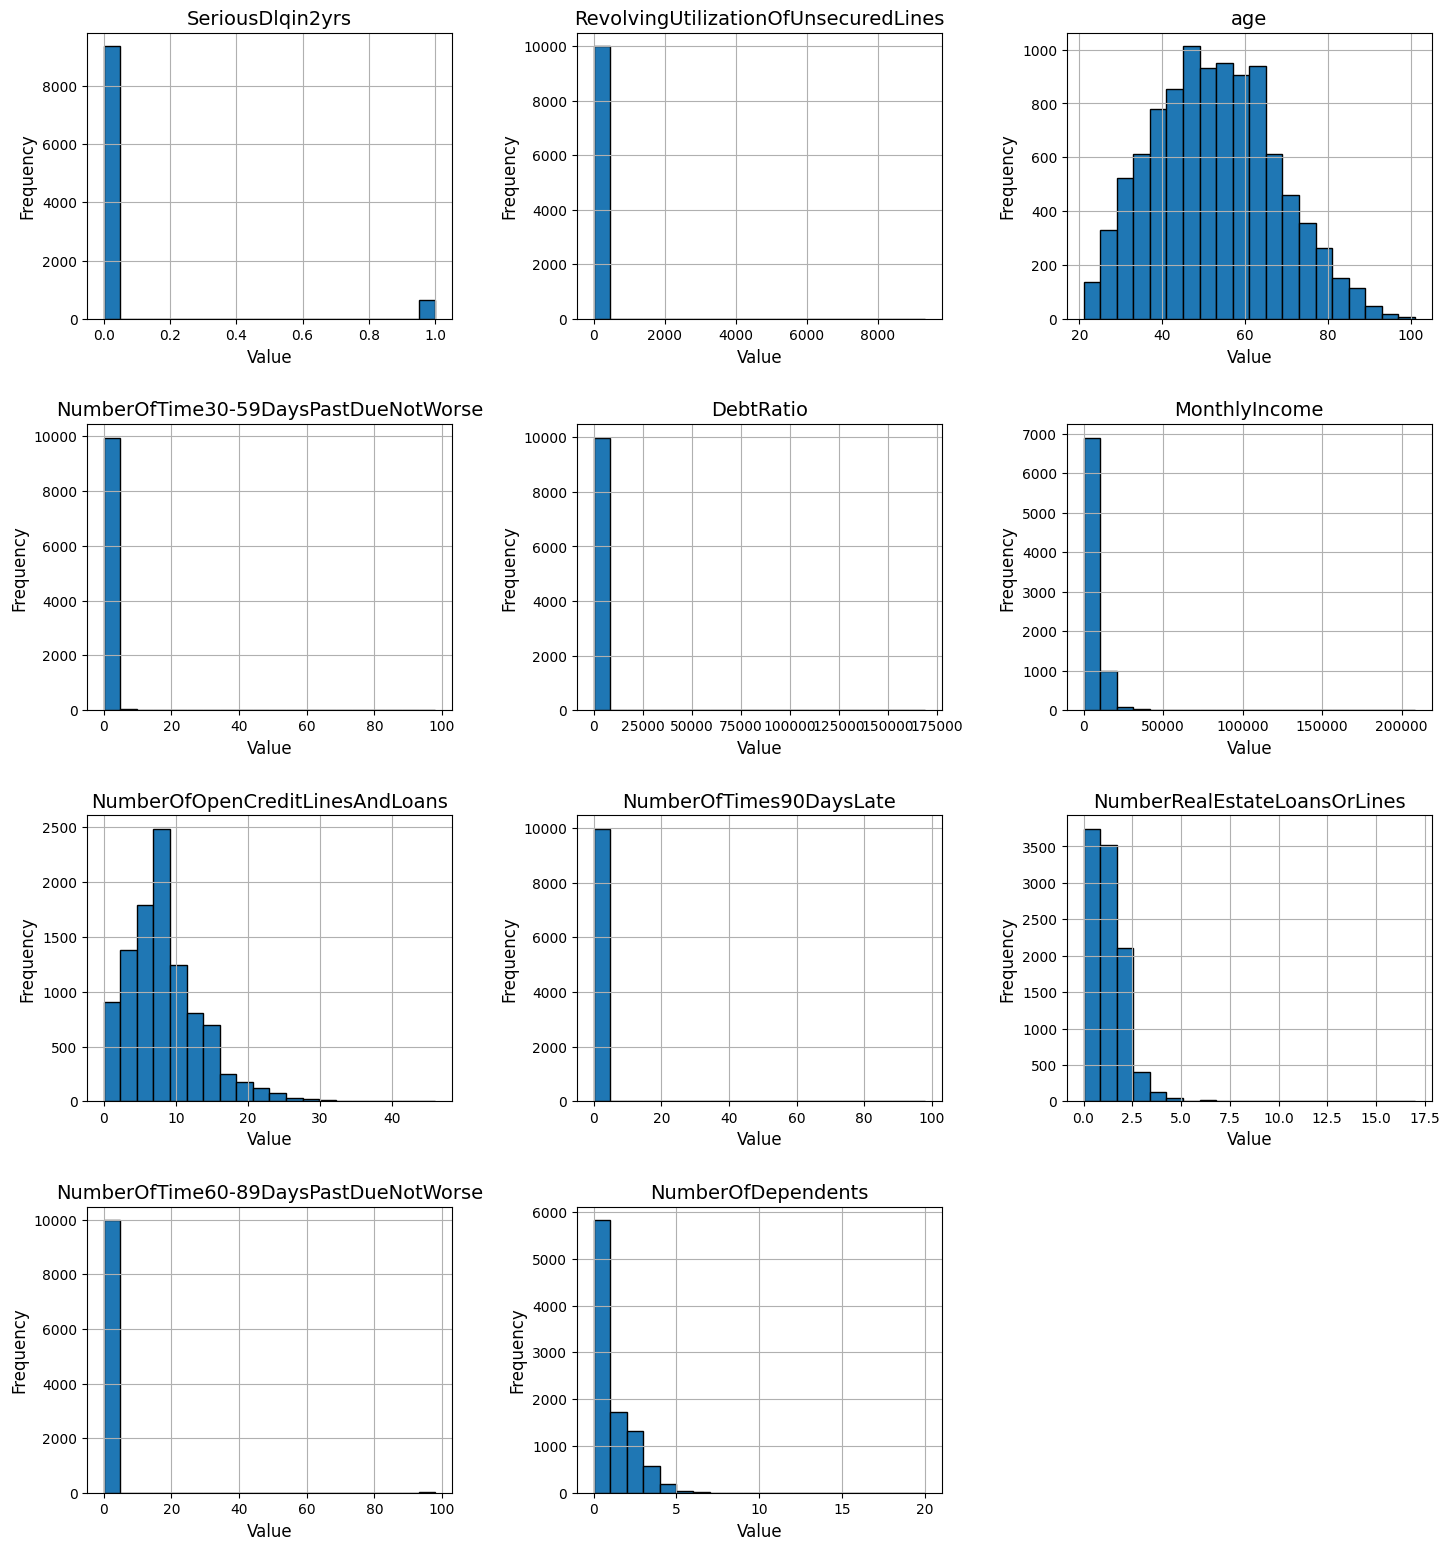


Missing Values Before Handling:
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           1974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       284
dtype: int64

Missing Values After Handling:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberO

In [ ]:
import pandas as pd

# === Load Dataset ===
# Option 1: For local Jupyter or GitHub clone
# file_path = 'data/credit_data.xlsx'

# Option 2: For Google Colab (if uploading manually)
file_path = '/content/credit_data.xlsx'

# Option 3: For Kaggle or other hosted notebooks
# file_path = '../input/credit-data/credit_data.xlsx'

# Load the dataset
data = pd.read_excel(file_path)


# Display dataset info
print("\nDataset Info:")
data.info()
# Adjust grid dimensions based on dataset columns
num_cols = len(data.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Dynamically calculate rows for 3 columns per row

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 4))  # Adjust height dynamically
axes = axes.flatten()  # Flatten for easy iteration

# Generate histograms
for i, col in enumerate(data.columns):
    data[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Hide unused subplots
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.5)  # Add padding for clear spacing
plt.show()
# Find missing values in each column
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Handle missing values
# Replace missing values in 'MonthlyIncome' with median
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

# Replace missing values in 'NumberOfDependents' with mode
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(data['NumberOfDependents'].mode()[0])

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(data.isnull().sum())

# Display column names
print("\nColumn Names:")
print(data.columns)

# Display dataset info
print("\nDataset Info:")
data.info()

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Outlier Detection:


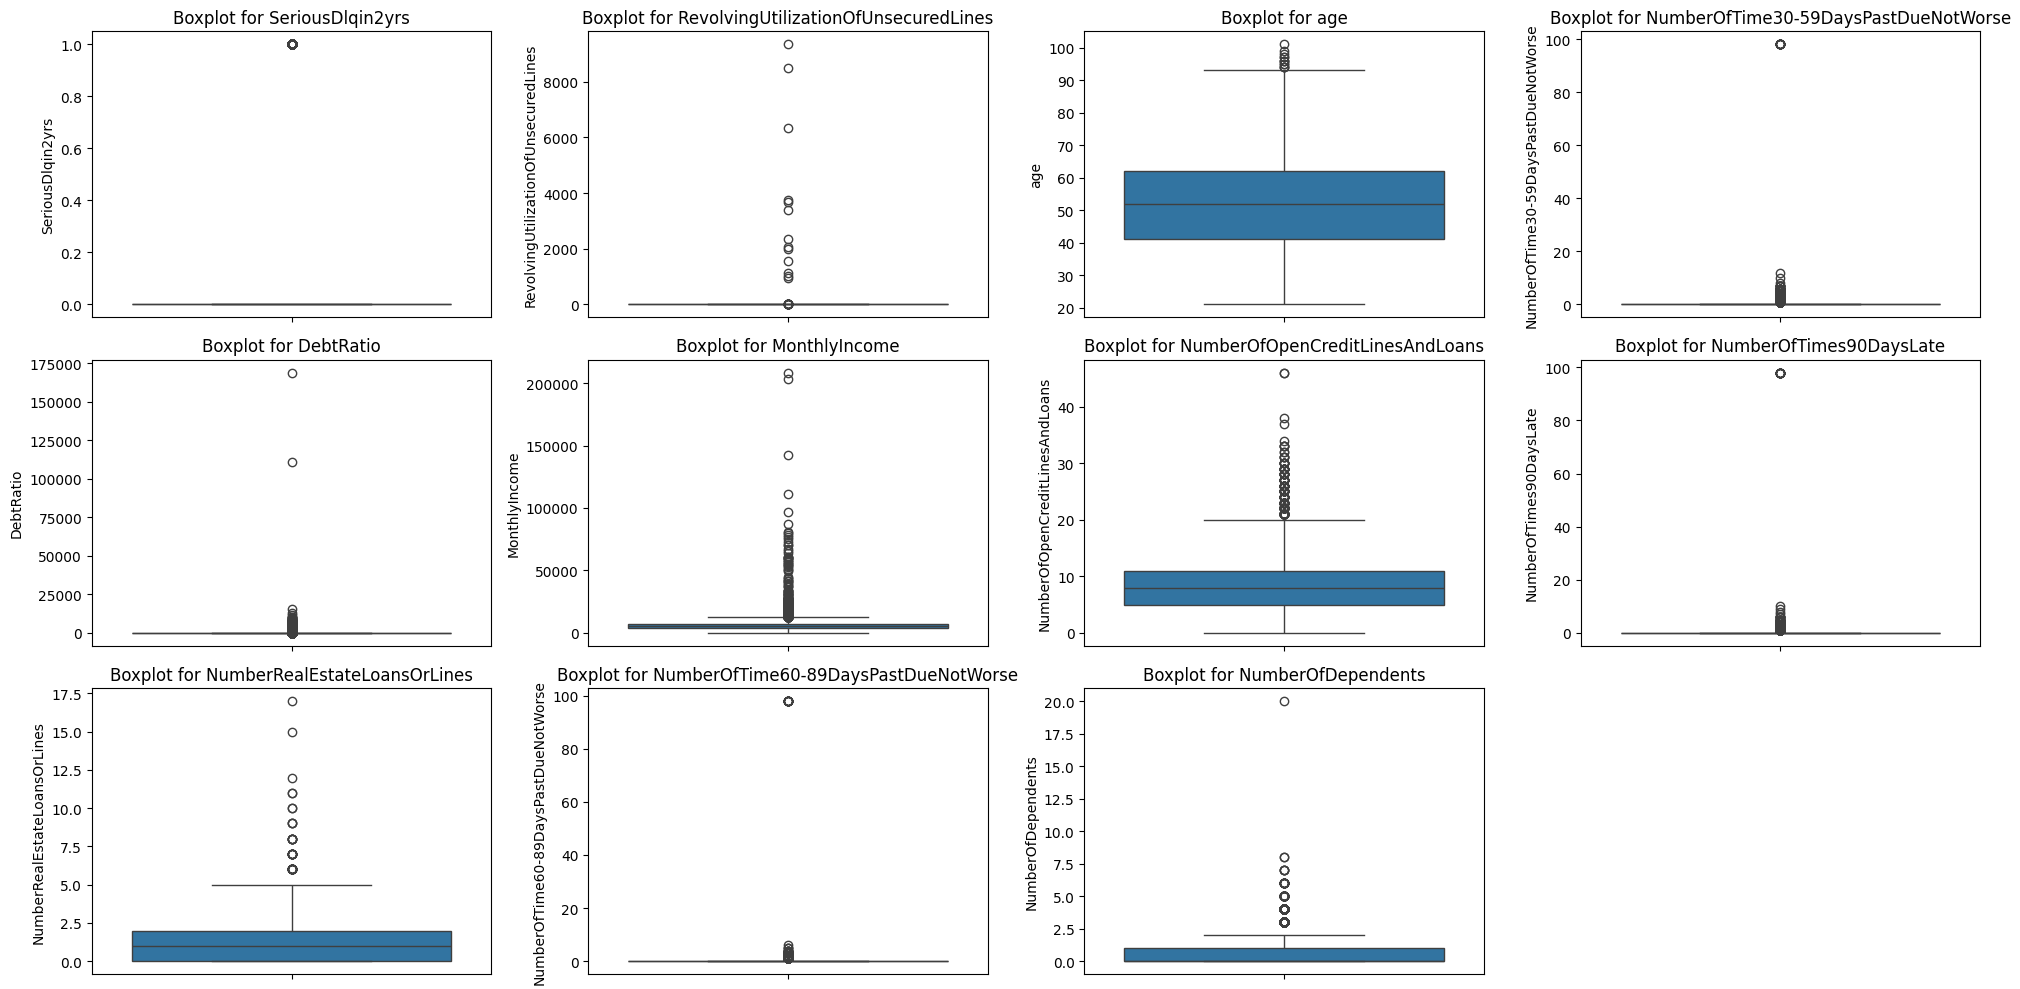

In [ ]:
# Outlier Detection
print("\nOutlier Detection:")
plt.figure(figsize=(20, 10))
for i, feature in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data[feature])
    plt.title(f"Boxplot for {feature}")
plt.tight_layout()
plt.show()

In [ ]:
import scorecardpy as sc

# Handling outliers using WOE binning
bins = sc.woebin(data, y='SeriousDlqin2yrs',
              min_perc_fine_bin=0.02,
              min_perc_coarse_bin=0.05,
              stop_limit=0.1,
              max_num_bin=8,
              method='tree' )



[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

[INFO] converting into woe values ...

Training Data Shape: (7500, 11)
Testing Data Shape: (2500, 11)


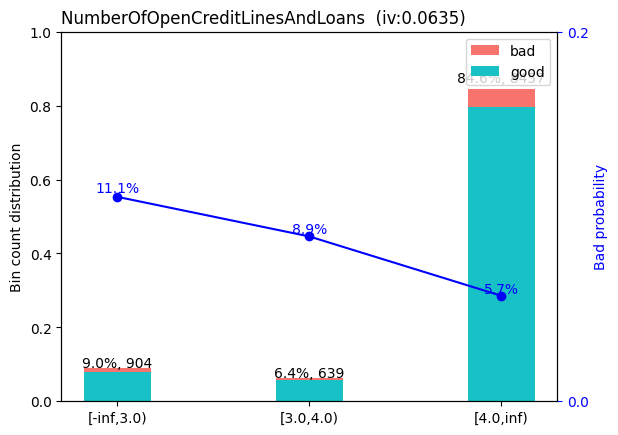

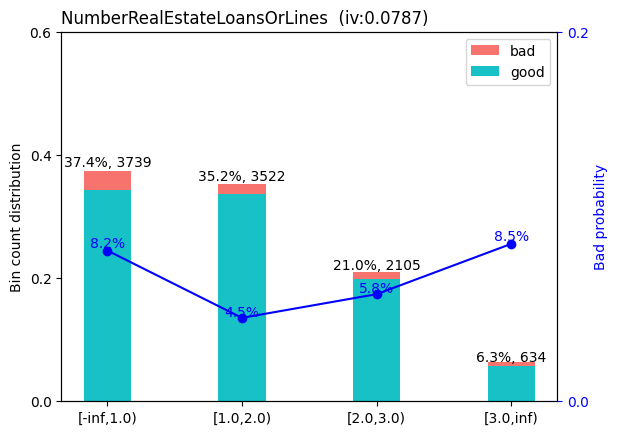

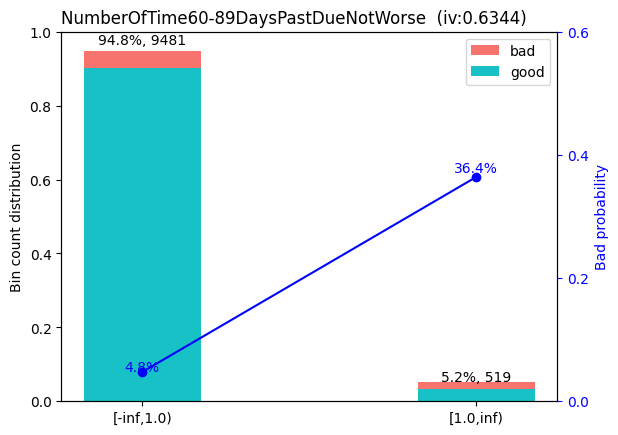

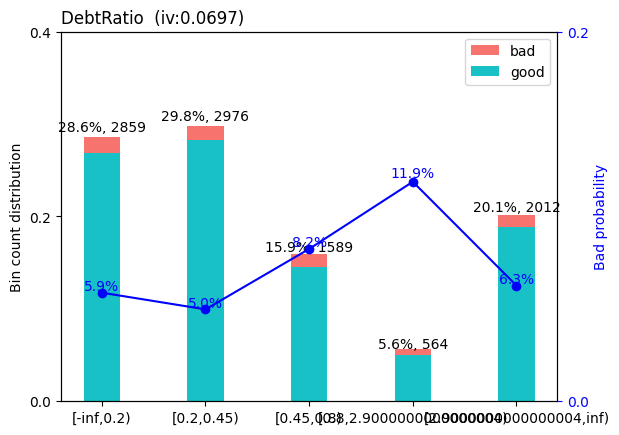

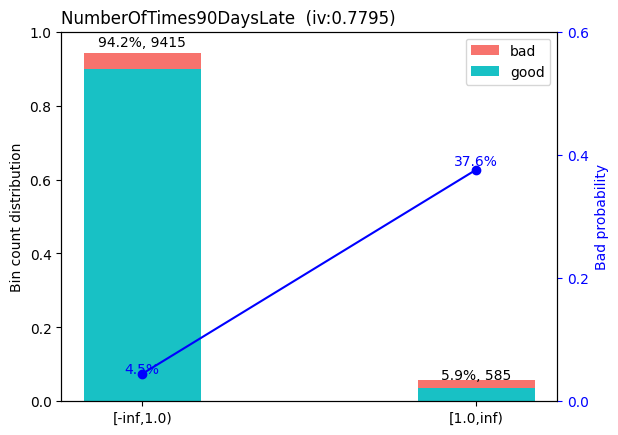

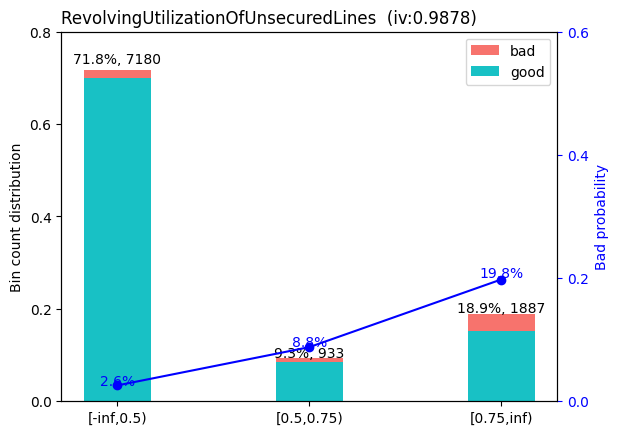

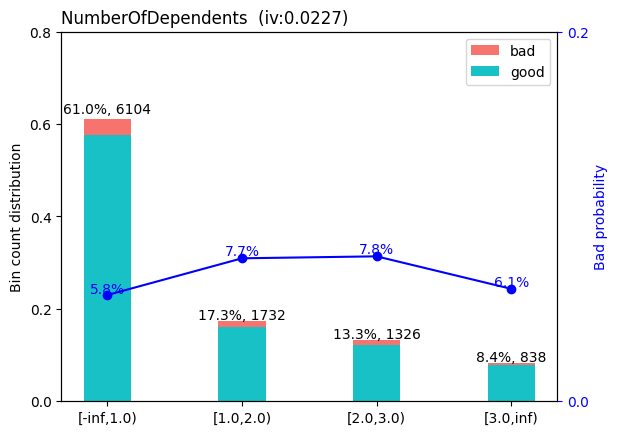

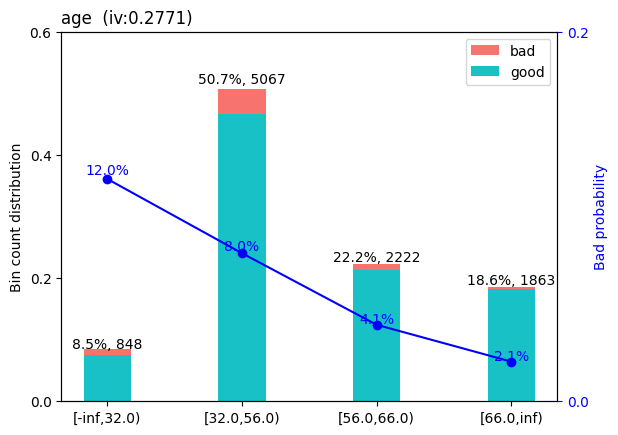

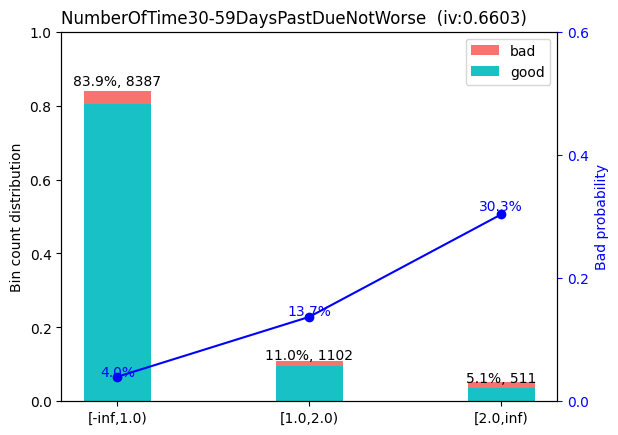

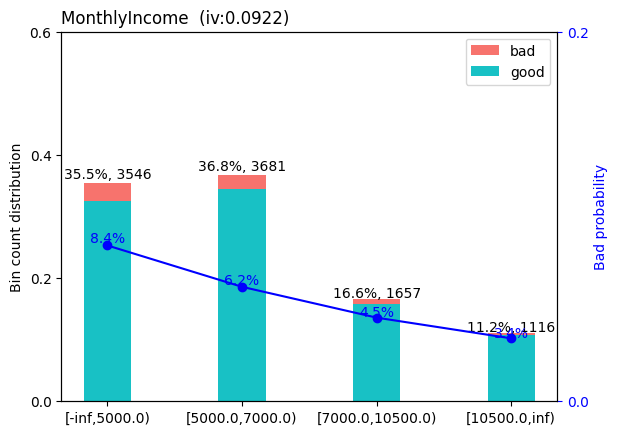

In [ ]:
# Apply bins
data_woe = sc.woebin_ply(data, bins)

sc.woebin_plot(bins)

# Split data into training and testing sets for WOE (Logistic Regression)
split_data = sc.split_df(data_woe, ratio=0.75, seed=42)
train = split_data['train']
test = split_data['test']

print("\nTraining Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)

In [ ]:
# Features and target for Logistic Regression
woe_features = ['RevolvingUtilizationOfUnsecuredLines_woe', 'age_woe','NumberOfTime30-59DaysPastDueNotWorse_woe',
                'MonthlyIncome_woe','NumberOfOpenCreditLinesAndLoans_woe', 'NumberOfTimes90DaysLate_woe',
                'NumberOfTime60-89DaysPastDueNotWorse_woe']

X_train_woe = train[woe_features]
X_test_woe = test[woe_features]
y_train_woe = train['SeriousDlqin2yrs']
y_test_woe = test['SeriousDlqin2yrs']

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_woe, y_train_woe)

# Predictions for Logistic Regression Model
y_pred_lr = lr_model.predict(X_test_woe)

In [ ]:
# Evaluation for Logistic Regression Model
print("\nLogistic Regression Accuracy:", accuracy_score(y_test_woe, y_pred_lr))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_woe, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_woe, y_pred_lr))


Logistic Regression Accuracy: 0.8204

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      2332
           1       0.25      0.81      0.38       168

    accuracy                           0.82      2500
   macro avg       0.61      0.82      0.64      2500
weighted avg       0.93      0.82      0.86      2500


Logistic Regression Confusion Matrix:
[[1915  417]
 [  32  136]]


In [ ]:
# ROC-AUC Score for Logistic Regression
auc_lr = roc_auc_score(y_test_woe, lr_model.predict_proba(X_test_woe)[:, 1])
print("\nLogistic Regression ROC-AUC Score:", auc_lr)



Logistic Regression ROC-AUC Score: 0.8590061667891857


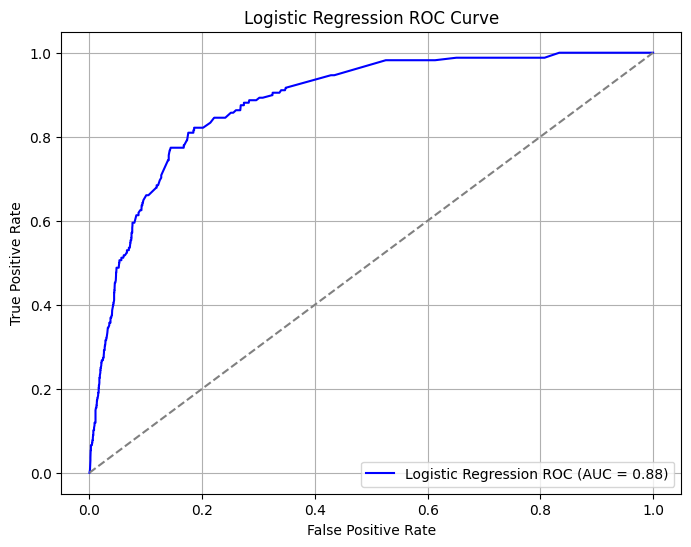

In [ ]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_woe, lr_model.predict_proba(X_test_woe)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression ROC (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Feature Importance for Logistic Regression:
RevolvingUtilizationOfUnsecuredLines_woe: 0.6259
age_woe: 0.5925
NumberOfTime30-59DaysPastDueNotWorse_woe: 0.5975
MonthlyIncome_woe: 0.2483
NumberOfOpenCreditLinesAndLoans_woe: 0.3152
NumberOfTimes90DaysLate_woe: 0.6061
NumberOfTime60-89DaysPastDueNotWorse_woe: 0.5649


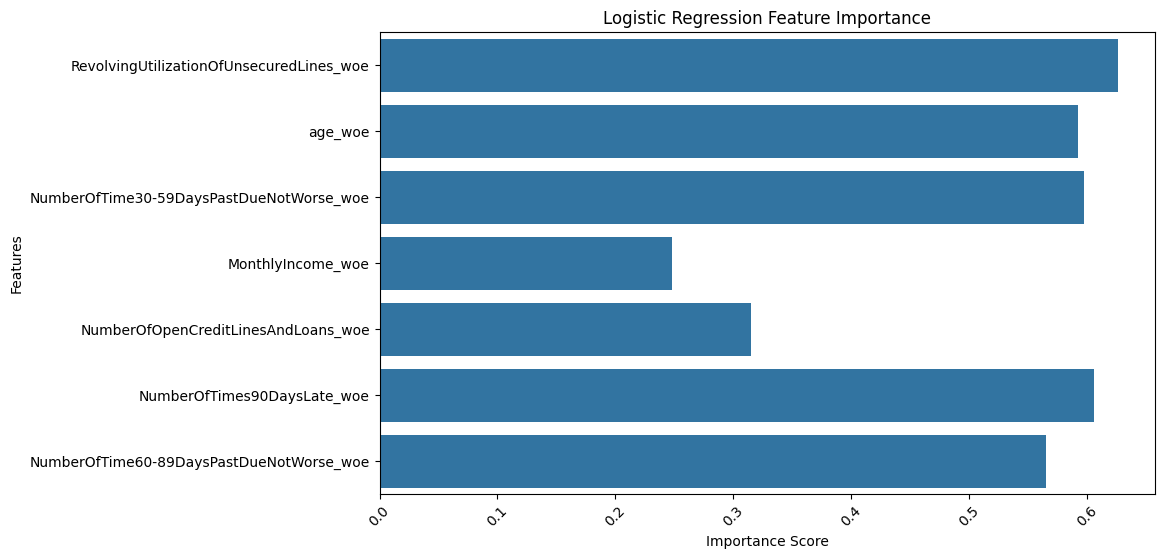

In [ ]:
# Feature Importance for Logistic Regression
importance_lr = abs(lr_model.coef_[0])
features_lr = X_train_woe.columns
# Print values
print("\nFeature Importance for Logistic Regression:")
for feature, importance in zip(features_lr, importance_lr):
    print(f"{feature}: {importance:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_lr, y=features_lr)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Random Forest Model using sc split
split_data_rf = sc.split_df(data, ratio=0.75, seed=42)
train_rf = split_data_rf['train']
test_rf = split_data_rf['test']

X_train_rf = train_rf.drop('SeriousDlqin2yrs', axis=1)
X_test_rf = test_rf.drop('SeriousDlqin2yrs', axis=1)
y_train_rf = train_rf['SeriousDlqin2yrs']
y_test_rf = test_rf['SeriousDlqin2yrs']

# Old Random Forest Model
o_rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
o_rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', random_state=36312401)

In [ ]:
# Evaluation for old Random Forest Model
y_pred_rf_old = o_rf_model.predict(X_test_rf)
print("\nOld Random Forest Accuracy:", accuracy_score(y_test_rf, y_pred_rf_old))
print("\nOld Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_old))
print("\nOld Random Forest Confusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf_old))


Old Random Forest Accuracy: 0.9324

Old Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2332
           1       0.48      0.08      0.13       168

    accuracy                           0.93      2500
   macro avg       0.71      0.54      0.55      2500
weighted avg       0.91      0.93      0.91      2500


Old Random Forest Confusion Matrix:
[[2318   14]
 [ 155   13]]



Old Random Forest ROC-AUC Score: 0.8450390018786245


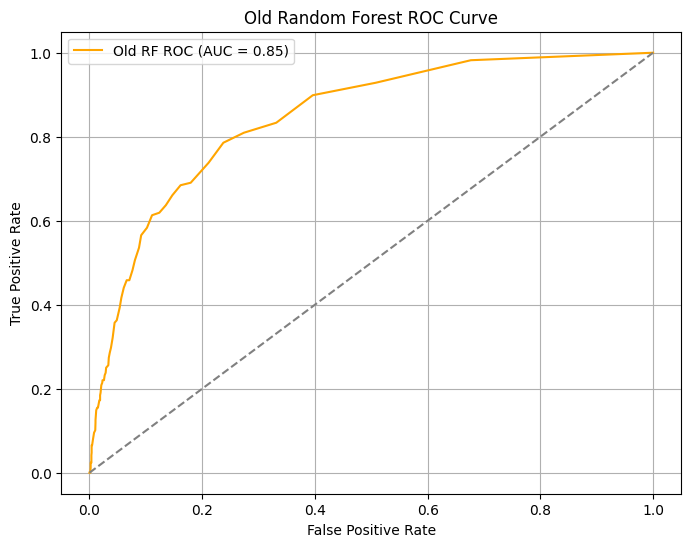

In [ ]:
# ROC-AUC Score for Old Random Forest
auc_rf_old = roc_auc_score(y_test_rf, o_rf_model.predict_proba(X_test_rf)[:, 1])
print("\nOld Random Forest ROC-AUC Score:", auc_rf_old)

# ROC Curve for Old Random Forest
fpr_old, tpr_old, _ = roc_curve(y_test_rf, o_rf_model.predict_proba(X_test_rf)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_old, tpr_old, color='orange', label=f'Old RF ROC (AUC = {auc_rf_old:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Old Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Feature Importance for Old Random Forest Model:
RevolvingUtilizationOfUnsecuredLines: 0.2369
age: 0.1278
NumberOfTime30-59DaysPastDueNotWorse: 0.0769
DebtRatio: 0.1364
MonthlyIncome: 0.1180
NumberOfOpenCreditLinesAndLoans: 0.0877
NumberOfTimes90DaysLate: 0.0829
NumberRealEstateLoansOrLines: 0.0396
NumberOfTime60-89DaysPastDueNotWorse: 0.0581
NumberOfDependents: 0.0357


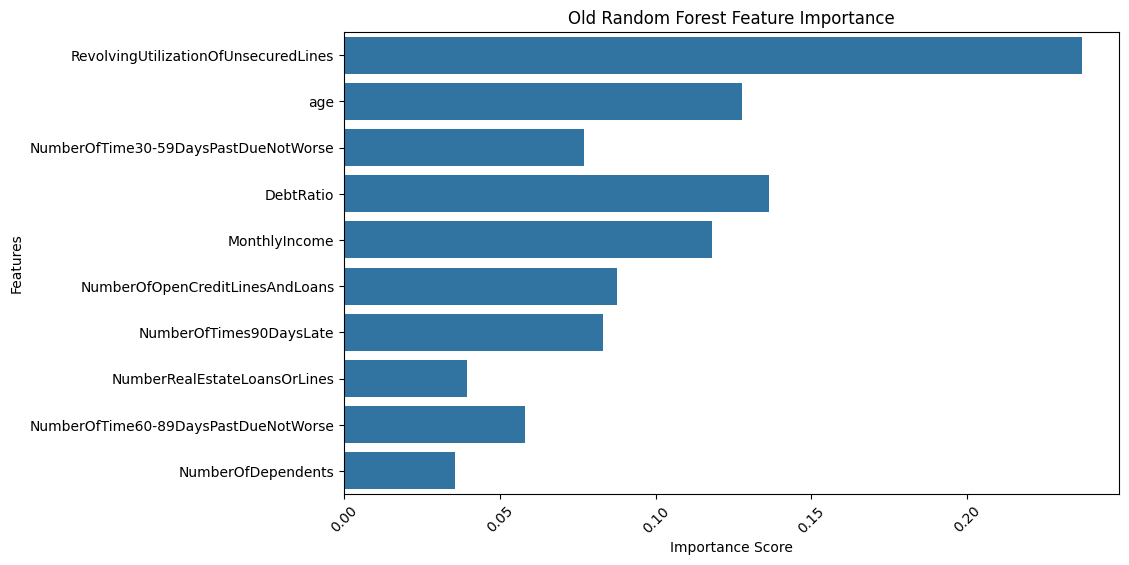

In [ ]:
# Feature Importance for Old Random Forest Model
importance_old = o_rf_model.feature_importances_
features_rf_old = X_train_rf.columns
# Print values
print("\nFeature Importance for Old Random Forest Model:")
for feature, importance in zip(features_rf_old, importance_old):
    print(f"{feature}: {importance:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_old, y=features_rf_old)
plt.title('Old Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

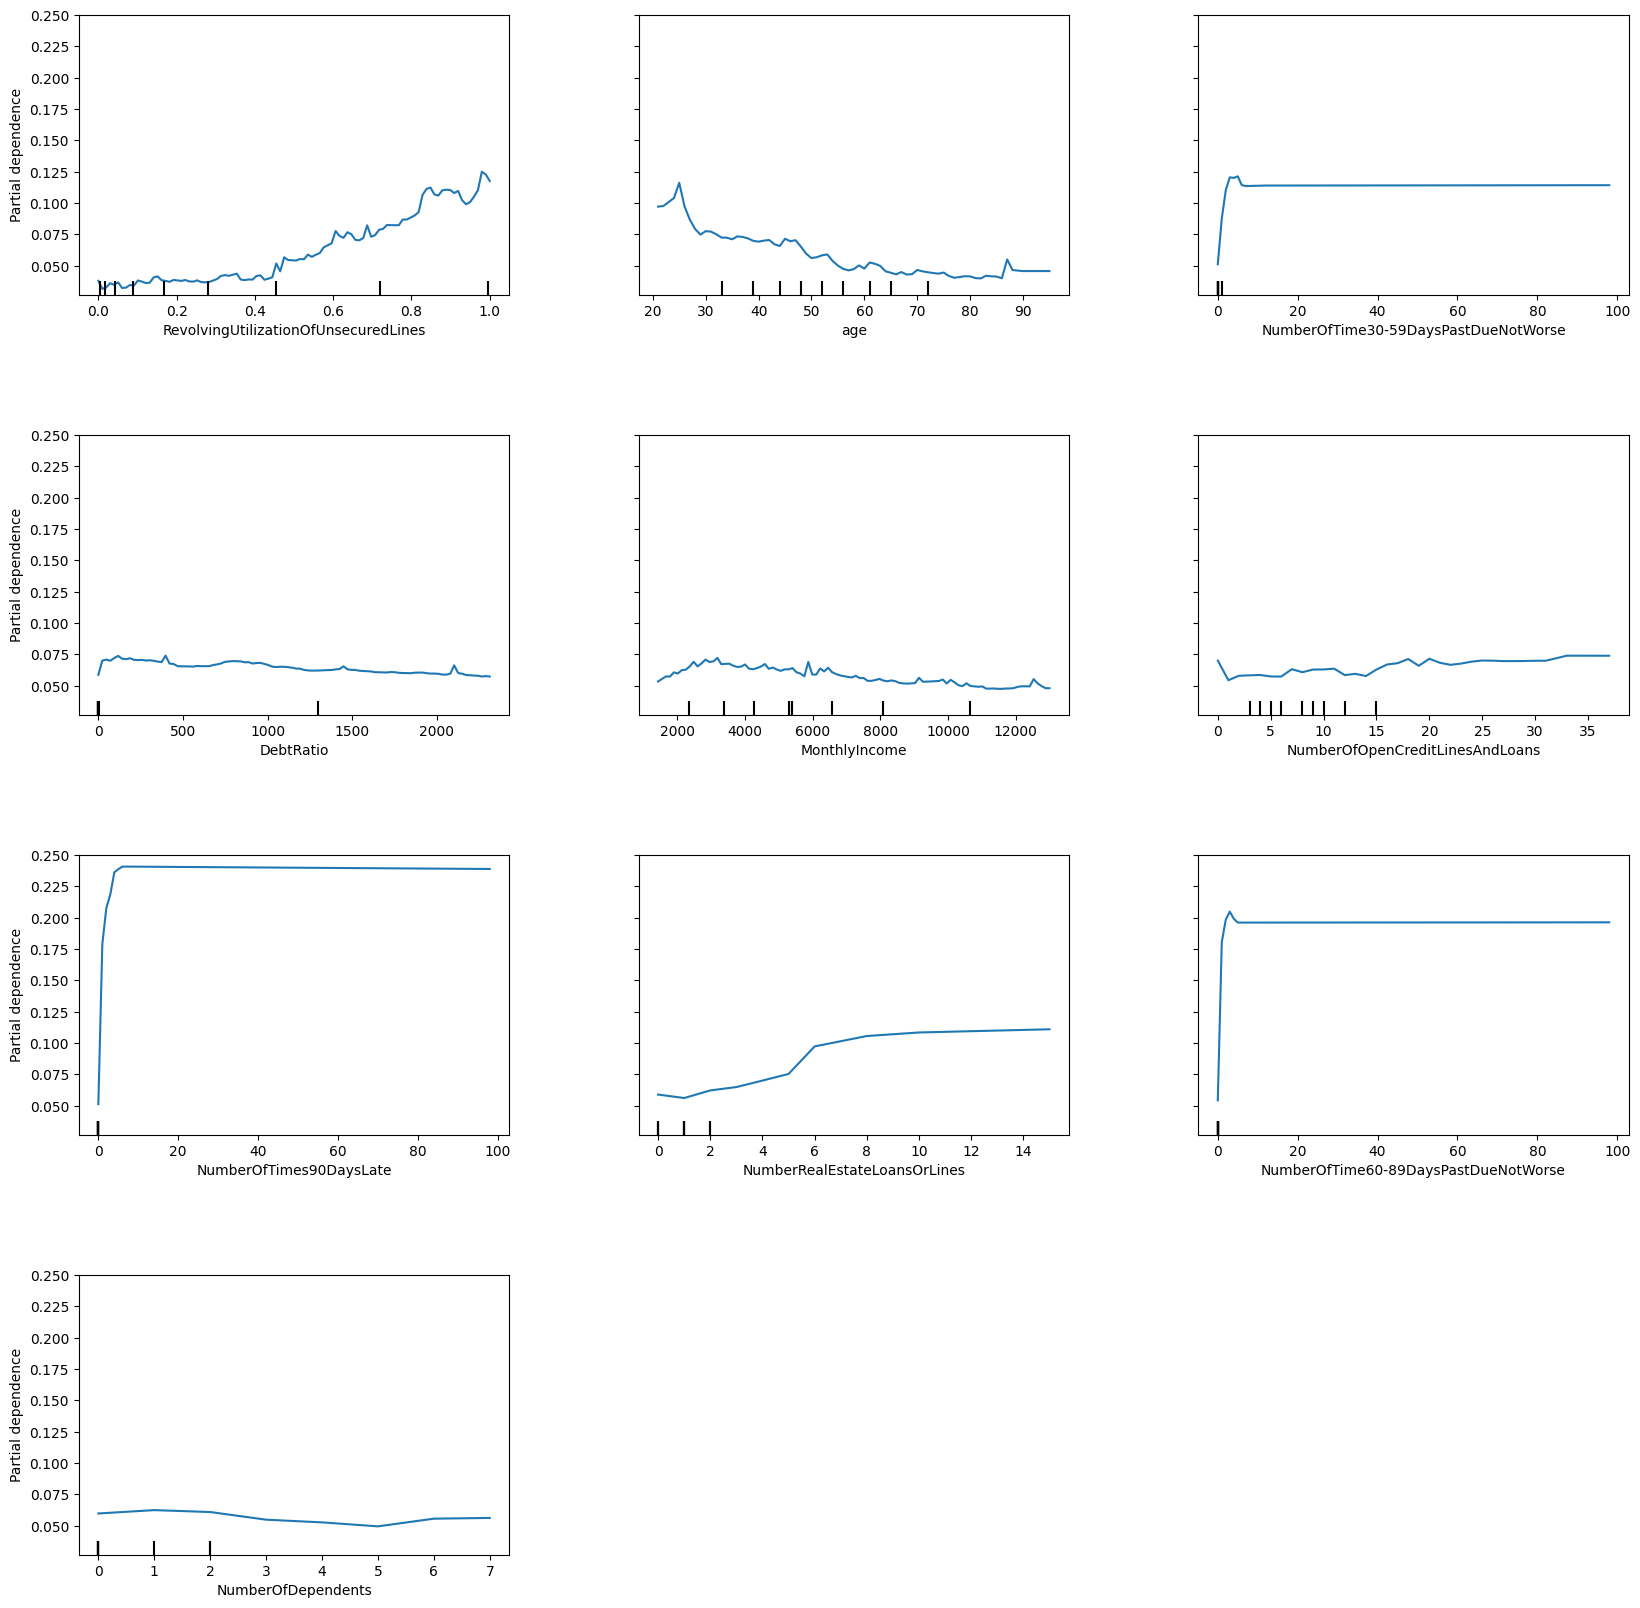

In [ ]:
# Partial Dependence Plots for Old Random Forest Model
from sklearn.inspection import PartialDependenceDisplay

features = X_train_rf.columns  # List of all features
plt.figure(figsize=(12, 8))

# Generate PDP for all features with spacing
fig, ax = plt.subplots(figsize=(20, 20))
PartialDependenceDisplay.from_estimator(o_rf_model, X_test_rf, features, n_cols=3, grid_resolution=100, ax=ax)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Optimized Random Forest Accuracy: 0.8272

Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2332
           1       0.25      0.76      0.37       168

    accuracy                           0.83      2500
   macro avg       0.61      0.80      0.64      2500
weighted avg       0.93      0.83      0.86      2500


Optimized Random Forest Confusion Matrix:
[[1940  392]
 [  40  128]]

Optimized Random Forest ROC-AUC Score: 0.8787942599852978


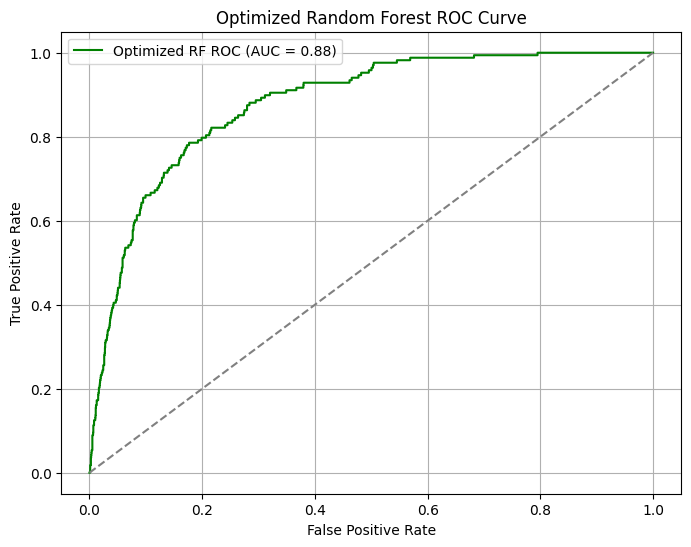


Feature Importance for Optimized Random Forest Model:
RevolvingUtilizationOfUnsecuredLines: 0.3394
age: 0.0768
NumberOfTime30-59DaysPastDueNotWorse: 0.1448
DebtRatio: 0.0352
MonthlyIncome: 0.0306
NumberOfOpenCreditLinesAndLoans: 0.0255
NumberOfTimes90DaysLate: 0.1913
NumberRealEstateLoansOrLines: 0.0150
NumberOfTime60-89DaysPastDueNotWorse: 0.1355
NumberOfDependents: 0.0058


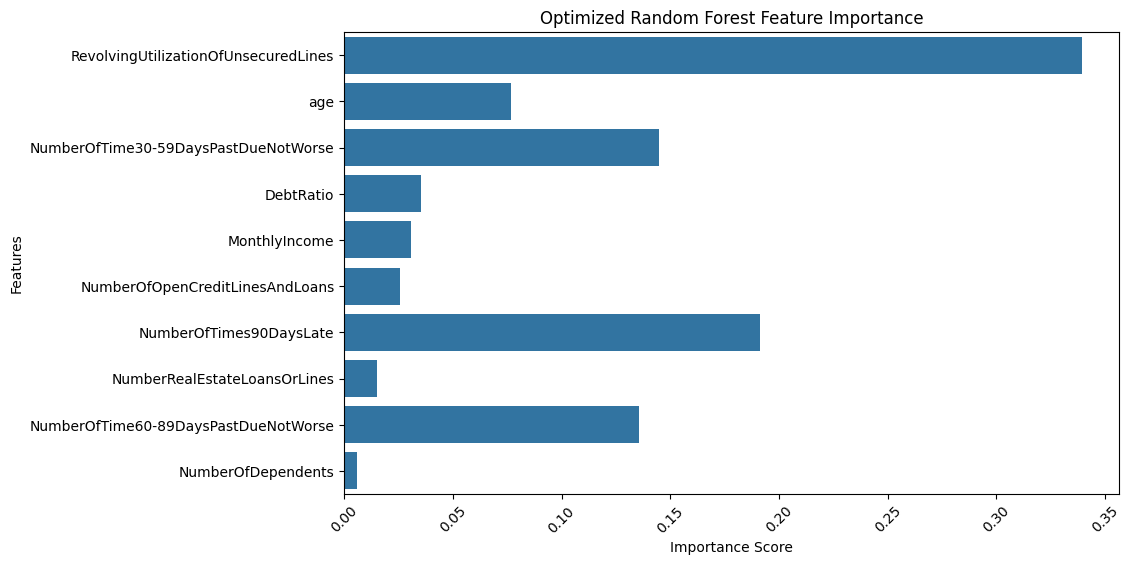

In [ ]:
# Handle features with flat trends
X_train_rf['DebtRatio'] = np.log1p(X_train_rf['DebtRatio'])
X_test_rf['DebtRatio'] = np.log1p(X_test_rf['DebtRatio'])

# Hyperparameter optimization for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train_rf, y_train_rf)

# Best model after GridSearch
best_rf_model = grid_search.best_estimator_

# Predictions for optimized Random Forest Model
y_pred_rf_opt = best_rf_model.predict(X_test_rf)

# Evaluation for optimized Random Forest Model
print("\nOptimized Random Forest Accuracy:", accuracy_score(y_test_rf, y_pred_rf_opt))
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_opt))
print("\nOptimized Random Forest Confusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf_opt))

# ROC-AUC Score for optimized Random Forest
auc_rf_opt = roc_auc_score(y_test_rf, best_rf_model.predict_proba(X_test_rf)[:, 1])
print("\nOptimized Random Forest ROC-AUC Score:", auc_rf_opt)

# ROC Curve for Optimized Random Forest
fpr_opt, tpr_opt, _ = roc_curve(y_test_rf, best_rf_model.predict_proba(X_test_rf)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_opt, tpr_opt, color='green', label=f'Optimized RF ROC (AUC = {auc_rf_opt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance for Optimized Random Forest Model
importance_opt = best_rf_model.feature_importances_
features_rf_opt = X_train_rf.columns

print("\nFeature Importance for Optimized Random Forest Model:")
for feature, importance in zip(features_rf_opt, importance_opt):
    print(f"{feature}: {importance:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_opt, y=features_rf_opt)
plt.title('Optimized Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

Calculated Class Weight (scale_pos_weight): 14.889830508474576
Training until validation scores don't improve for 10 rounds
[10]	train's auc: 0.92117	valid's auc: 0.860456
[20]	train's auc: 0.941091	valid's auc: 0.864974
[30]	train's auc: 0.95338	valid's auc: 0.866613
[40]	train's auc: 0.964942	valid's auc: 0.864657
Early stopping, best iteration is:
[31]	train's auc: 0.954511	valid's auc: 0.867916

LightGBM Model Accuracy with Class Weights: 0.8492

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      2332
           1       0.27      0.71      0.39       168

    accuracy                           0.85      2500
   macro avg       0.62      0.79      0.65      2500
weighted avg       0.93      0.85      0.88      2500


Confusion Matrix:
[[2003  329]
 [  48  120]]

LightGBM Model ROC-AUC Score with Class Weights: 0.8679155946255003


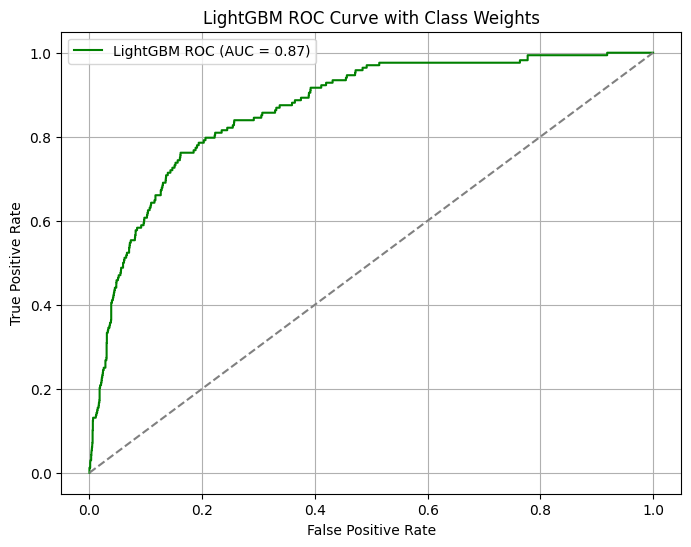

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from lightgbm import early_stopping, log_evaluation
import scorecardpy as sc

# Split Data Using sc.split_df
split_data = sc.split_df(data, ratio=0.75, seed=42)
train = split_data['train']
test = split_data['test']

# Prepare Features and Target
X_train = train.drop('SeriousDlqin2yrs', axis=1)
X_test = test.drop('SeriousDlqin2yrs', axis=1)
y_train = train['SeriousDlqin2yrs']
y_test = test['SeriousDlqin2yrs']

# Create LightGBM Dataset
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Calculate Class Weights
class_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("Calculated Class Weight (scale_pos_weight):", class_weight)

# Update Parameters with Class Weight
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1,
    'seed': 42,
    'scale_pos_weight': class_weight  # Add calculated class weight
}

# Train LightGBM Model with Class Weights
lgbm_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'valid'],
    callbacks=[early_stopping(stopping_rounds=10), log_evaluation(10)]
)

# Predictions
y_pred_prob = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation Metrics
print("\nLightGBM Model Accuracy with Class Weights:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
auc_lgbm = roc_auc_score(y_test, y_pred_prob)
print("\nLightGBM Model ROC-AUC Score with Class Weights:", auc_lgbm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'LightGBM ROC (AUC = {auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve with Class Weights')
plt.legend()
plt.grid(True)
plt.show()